In [1]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances

from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense

from DEN import DENlayer
from DMN import DMNlayer
from DSN import DSNlayer


from PreTrain.HpC import HSpC
from PreTrain.HpC import HEpC
from PreTrain.HpC import HBpC

from PreTrain.kmeans import bkmeans
from PreTrain.kmeans import ekmeans
from PreTrain.kmeans import skmeans



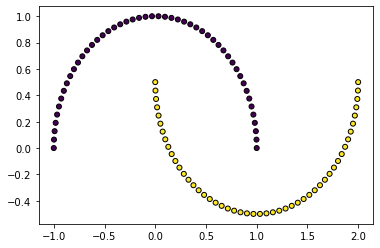

In [2]:
x,y = make_moons(n_samples=100, shuffle=True, noise=None, random_state=None)

fig, ax = plt.subplots()
ax.scatter(x[:, 0], x[:, 1], marker='o', c=y,
            s=25, edgecolor='k')
plt.show()


In [3]:

unidades=3
hbpc_dendrites  = HBpC.HBpC(x,y,0.0001)
hepc_dendrites  = HEpC.HEpC(x,y)
hspc_dendrites  = HSpC.HSpC(x,y,0.0001)
bkmeans_dendrites  = bkmeans.bkmeans(x,y,[3,3,3],0.01)
ekmeans_dendrites  = ekmeans.ekmeans(x,y,[3])
skmeans_dendrites  = skmeans.skmeans(x,y,[2],0.01)



Estamos dentro
[0 1]
Wmin: [-1.0001, -0.0001] Wmax: [1.0001, 0.9995862162006879]
Clusters n [0 1 2]
clusters [[ 0.32769911 -0.240278  ]
 [ 0.00820999  0.37212284]
 [ 0.          0.5       ]
 [ 0.1619119  -0.0455349 ]
 [ 0.3765102  -0.28183148]
 [ 0.28165065 -0.19568255]
 [ 0.05094425  0.18489178]
 [ 0.00205461  0.43592978]
 [ 0.23855404 -0.1482284 ]
 [ 0.09903113  0.06611626]
 [ 0.19858638 -0.09811053]
 [ 0.01844084  0.30884137]
 [ 0.03270514  0.24634542]
 [ 0.1286813   0.00928245]
 [ 0.07308324  0.124733  ]
 [ 0.42788334 -0.32017225]]
Dimensiones 2
clusters [[ 1.96729486  0.24634542]
 [ 1.98155916  0.30884137]
 [ 2.          0.5       ]
 [ 1.76144596 -0.1482284 ]
 [ 1.99179001  0.37212284]
 [ 1.71834935 -0.19568255]
 [ 1.6234898  -0.28183148]
 [ 1.46253829 -0.38659931]
 [ 1.8380881  -0.0455349 ]
 [ 1.51839257 -0.35514276]
 [ 1.8713187   0.00928245]
 [ 1.92691676  0.124733  ]
 [ 1.99794539  0.43592978]
 [ 1.94905575  0.18489178]
 [ 1.57211666 -0.32017225]
 [ 1.90096887  0.06611626]
 [ 

In [6]:

def DEN_Test(n_dendrites, dendrites):
    model = Sequential()
    model.add(DENlayer(n_dendrites, dendrites, activation = "sigmoid", input_shape = (np.shape(x)[1],)))
    model.add(Dense(1, activation = 'sigmoid')) 
    return model




In [7]:
def DSN_Test(n_dendrites, dendrites):
    model = Sequential()
    model.add(DSNlayer(n_dendrites, dendrites, activation = "sigmoid", input_shape = (np.shape(x)[1],)))
    model.add(Dense(1, activation = 'sigmoid')) 
    return model



In [8]:
def DMN_Test(n_dendrites, dendrites):
    model = Sequential()
    model.add(DMNlayer(n_dendrites, dendrites, activation = "sigmoid", input_shape = (np.shape(x)[1],)))
    model.add(Dense(1, activation = 'sigmoid')) 
    return model



In [9]:


model = DMN_Test(0,hbpc_dendrites)  #DMN_Test()/DEN_Test/DSN_Test
model.summary()
model.compile(optimizer = optimizers.RMSprop(lr = 0.05),
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dm_nlayer (DMNlayer)         (None, 1)                 4         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 6
Trainable params: 6
Non-trainable 

In [10]:
history = model.fit(x, y,
                     epochs = 100,
                     batch_size = 128)

Epoch 1/100
1/1 [==============================] - 0s 1ms/step - loss: 0.7675 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 992us/step - loss: 0.7250 - accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 982us/step - loss: 0.7088 - accuracy: 0.4700
Epoch 4/100
1/1 [==============================] - 0s 0s/step - loss: 0.6990 - accuracy: 0.3900
Epoch 5/100
1/1 [==============================] - 0s 997us/step - loss: 0.6917 - accuracy: 0.3700
Epoch 6/100
1/1 [==============================] - 0s 943us/step - loss: 0.6856 - accuracy: 0.5600
Epoch 7/100
1/1 [==============================] - 0s 0s/step - loss: 0.6797 - accuracy: 0.6900
Epoch 8/100
1/1 [==============================] - 0s 0s/step - loss: 0.6738 - accuracy: 0.7600
Epoch 9/100
1/1 [==============================] - 0s 0s/step - loss: 0.6674 - accuracy: 0.8100
Epoch 10/100
1/1 [==============================] - 0s 998us/step - loss: 0.6609 - accuracy: 0.8900
Epoch 11/100
1/1 [=====

Epoch 84/100
1/1 [==============================] - 0s 1ms/step - loss: 0.4796 - accuracy: 0.8800
Epoch 85/100
1/1 [==============================] - 0s 997us/step - loss: 0.4779 - accuracy: 0.8900
Epoch 86/100
1/1 [==============================] - 0s 1ms/step - loss: 0.4763 - accuracy: 0.8800
Epoch 87/100
1/1 [==============================] - 0s 0s/step - loss: 0.4746 - accuracy: 0.8900
Epoch 88/100
1/1 [==============================] - 0s 996us/step - loss: 0.4730 - accuracy: 0.8800
Epoch 89/100
1/1 [==============================] - 0s 998us/step - loss: 0.4713 - accuracy: 0.8900
Epoch 90/100
1/1 [==============================] - 0s 998us/step - loss: 0.4698 - accuracy: 0.8800
Epoch 91/100
1/1 [==============================] - 0s 0s/step - loss: 0.4683 - accuracy: 0.8900
Epoch 92/100
1/1 [==============================] - 0s 0s/step - loss: 0.4662 - accuracy: 0.8800
Epoch 93/100
1/1 [==============================] - 0s 0s/step - loss: 0.4647 - accuracy: 0.8900
Epoch 94/100
1/1

Text(0, 0.5, 'x2')

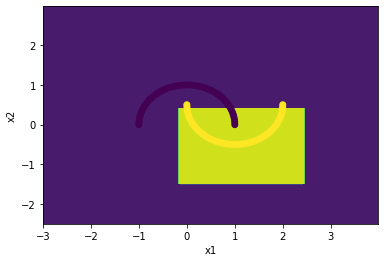

In [14]:
# Decision Boundary
h = 0.02
scale = 2
x_min, x_max = x[:, 0].min() - scale, x[:, 0].max() + scale
y_min, y_max = x[:, 1].min() - scale, x[:, 1].max() + scale
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = np.c_[xx.ravel(), yy.ravel()]
out = model.predict(Z, batch_size = 1024, verbose = 0)

out = (out >= 0.5).astype(int)
out = out.reshape(xx.shape)

plt.contourf(xx, yy, out)
plt.scatter(x[:, 0], x[:, 1], c = y)
plt.xlabel('x1')
plt.ylabel('x2')

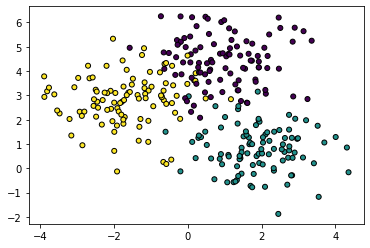

In [12]:
from sklearn.datasets import make_blobs
from keras.utils import to_categorical

Xb, yb = make_blobs(n_samples=300, centers=3, n_features=2,
                  random_state=0)

Yb = to_categorical(yb)
#Yb = Yb[:,1:] 
#print(Yb)



fig, ax = plt.subplots()

ax.scatter(Xb[:, 0], Xb[:, 1], marker='o', c=yb,
            s=25, edgecolor='k')

plt.show()

In [ ]:
print(len(yb))
#dendrites = HBpC(Xb,yb)
#dendrites = HEpC(Xb,yb)
dendrites = HSpC.HSpC(Xb,yb)
#dendrites = bkmeans(Xb,yb,[3,3,3])
#dendrites = ekmeans(Xb,yb,[5,5,5])
#dendrites = skmeans(Xb,yb,[5,5,5])

print(dendrites)


In [ ]:
dendrites[0].shape

In [ ]:
def TestModel():  
   model = Sequential()
   model.add(DSNlayer(40, dendrites,activation='relu', input_shape = (np.shape(Xb)[1],)))
   
   #model.add(DENlayer(6, activation = 'sigmoid' ))
   model.add(Dense(3, activation = 'softmax')) 
   return model

#yb =  to_categorical(yb, dtype ="uint8") 

model = TestModel()
model.summary()
model.compile(optimizer = optimizers.RMSprop(lr = 0.01),
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])



In [ ]:
history = model.fit(Xb, Yb,
                    epochs = 2000,
                    batch_size = 128)


In [ ]:
# Decision Boundary
h = 0.02
scale = 1
x_min, x_max = Xb[:, 0].min() - scale, Xb[:, 0].max() + scale
y_min, y_max = Xb[:, 1].min() - scale, Xb[:, 1].max() + scale
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = np.c_[xx.ravel(), yy.ravel()]
out = model.predict(Z, batch_size = 1024, verbose = 0)
print(out.shape)

print(type(out))
out2 = np.zeros(out.shape[0])

for n in range(out.shape[0]):
    out2[n] = np.argmax(out[n])
          
    
print((out2))
out2 = out2.reshape(xx.shape)

#out = (out >= 0.5).astype(int)
#out = out.reshape(xx.shape)

plt.contourf(xx, yy, out2)
plt.scatter(Xb[:, 0], Xb[:, 1], c = yb)
plt.xlabel('x1')
plt.ylabel('x2')